# Football Statistics Analysis: A Practical Case with Apache Spark and RDDs

#### Executive Summary:

This project is a practical demonstration of Big Data analysis skills using Apache Spark technology. The objective is to process and analyze a fictional dataset of La Liga football player statistics.

#### Methodology and tools:
Working in the Databricks environment, we will use Apache Spark to perform a series of key operations, which include:

1. Creating a DataFrame from a collection of structured data.

2. Filtering data based on a specific criterion.

3. Calculating aggregation metrics such as maximum, minimum, and average values.

4. Unioning multiple datasets.

5. Visualizing the correlation between variables to gain insights.

This exercise showcases the capabilities of the Spark framework for efficiently handling and transforming data.

### Import libraries

In [0]:
from pyspark.sql import SparkSession, Row

#### Task 1: Create RDD

In [0]:
from pyspark.sql import Row

# 1. List of players for La Liga 2024-2025 season
datos_jugadores = [
    Row(nombre="Lionel Messi", edad=37, goles=25),
    Row(nombre="Antoine Griezmann", edad=33, goles=18),
    Row(nombre="Karim Benzema", edad=36, goles=30),
    Row(nombre="Robert Lewandowski", edad=36, goles=22),
    Row(nombre="Joao Félix", edad=24, goles=12),
    Row(nombre="Vinicius Junior", edad=24, goles=26),
    Row(nombre="Isco Alarcón", edad=32, goles=8),
    Row(nombre="Luka Modric", edad=39, goles=5),
    Row(nombre="Pedri González", edad=21, goles=10),
    Row(nombre="Frenkie de Jong", edad=27, goles=7),
    Row(nombre="Marc-Andre ter Stegen", edad=32, goles=0),
    Row(nombre="Gerard Moreno", edad=32, goles=16),
    Row(nombre="Álvaro Morata", edad=31, goles=14),
    Row(nombre="Joselu", edad=34, goles=19),
    Row(nombre="Yannick Carrasco", edad=31, goles=11),
    Row(nombre="Eder Militao", edad=26, goles=2),
    Row(nombre="Gavi", edad=20, goles=6),
    Row(nombre="Ansu Fati", edad=22, goles=9)
]

# 2. Convert list to DataFrame
df_jugadores = spark.createDataFrame(datos_jugadores)

# 3. Display DataFrame
display(df_jugadores)

# 4. Show first 3 rows using DataFrame API
display(df_jugadores.limit(3))


nombre,edad,goles
Lionel Messi,37,25
Antoine Griezmann,33,18
Karim Benzema,36,30
Robert Lewandowski,36,22
Joao Félix,24,12
Vinicius Junior,24,26
Isco Alarcón,32,8
Luka Modric,39,5
Pedri González,21,10
Frenkie de Jong,27,7


nombre,edad,goles
Lionel Messi,37,25
Antoine Griezmann,33,18
Karim Benzema,36,30


#### Task 2: Filter by Goals

In [0]:
# Filter the DF to show only players with more than 20 goals
# The result will be a new DF
jugadores_con_muchos_goles = df_jugadores.filter(df_jugadores.goles > 20)

# Display the result to verify
display(jugadores_con_muchos_goles)

nombre,edad,goles
Lionel Messi,37,25
Karim Benzema,36,30
Robert Lewandowski,36,22
Vinicius Junior,24,26


#### Task 3: Find the Maximum and Minimum Goals

In [0]:
from pyspark.sql.functions import max, min

# 1. Get the min and max goals from the DataFrame
min_max_goles_df = df_jugadores.agg(min("goles").alias("min_goles"), max("goles").alias("max_goles"))

# 2. Extract the min and max goal values from the result
min_goles = min_max_goles_df.collect()[0]["min_goles"]
max_goles = min_max_goles_df.collect()[0]["max_goles"]

# 3. Filter the original DataFrame to find the player(s) with the min and max goals
jugadores_min_max = df_jugadores.filter((df_jugadores.goles == min_goles) | (df_jugadores.goles == max_goles))

# 4. Display the results
display(jugadores_min_max)

nombre,edad,goles
Karim Benzema,36,30
Marc-Andre ter Stegen,32,0


####### _Note: The minimum score of 0 goals corresponds to a goalkeeper (Ter Stegen). This is an expected and logical result in the analysis of football data._

#### Task 4: Calculate the Mean of Goals

In [0]:
from pyspark.sql.functions import avg

# Calculate the average number of goals
promedio_goles = df_jugadores.agg(avg("goles").alias("promedio_goles"))

# Display the result
display(promedio_goles)

promedio_goles
13.333333333333334


#### Task 5: Union Two DataFrames

In [0]:
from pyspark.sql import Row

# 1. Create a DataFrame for the second set of data (another tournament)
datos_torneo_b = [
    Row(nombre="Lionel Messi", edad=37, goles=5),
    Row(nombre="Neymar Jr", edad=33, goles=12),
    Row(nombre="Cristiano Ronaldo", edad=39, goles=20),
    Row(nombre="Kylian Mbappé", edad=25, goles=18),
    Row(nombre="Harry Kane", edad=31, goles=15)
]

df_torneo_b = spark.createDataFrame(datos_torneo_b)

# 2. Union the two DataFrames
# The unionByName method
df_torneos_unidos = df_jugadores.unionByName(df_torneo_b, allowMissingColumns=True)

# 3. Display the final combined DataFrame
display(df_torneos_unidos)

nombre,edad,goles
Lionel Messi,37,25
Antoine Griezmann,33,18
Karim Benzema,36,30
Robert Lewandowski,36,22
Joao Félix,24,12
Vinicius Junior,24,26
Isco Alarcón,32,8
Luka Modric,39,5
Pedri González,21,10
Frenkie de Jong,27,7


#### Task 6: Scatterplot correlation

nombre,edad,goles
Lionel Messi,37,25
Antoine Griezmann,33,18
Karim Benzema,36,30
Robert Lewandowski,36,22
Joao Félix,24,12
Vinicius Junior,24,26
Isco Alarcón,32,8
Luka Modric,39,5
Pedri González,21,10
Frenkie de Jong,27,7


<Axes: xlabel='edad', ylabel='goles'>

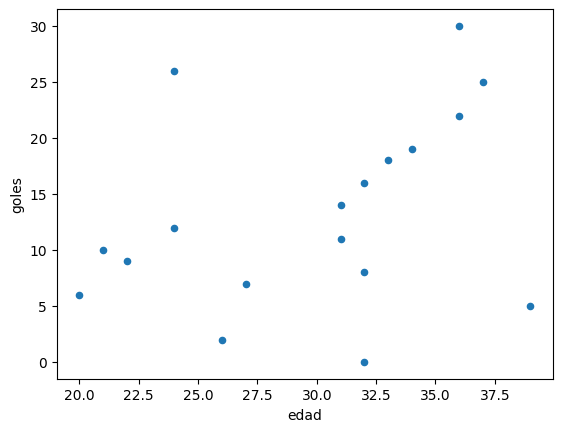

In [0]:
# Create scatterplot graphic with ages an goals
display(df_jugadores.select("nombre", "edad", "goles").toPandas())

# Show the graphic
display(df_jugadores.select("nombre", "edad", "goles").toPandas().plot.scatter(x="edad", y="goles"))

#### Summary of the Spark Project

This project was a practical demonstration of Apache Spark's capabilities within a Databricks environment. The successfully processed and analyzed a structured dataset of fictional football player statistics. Through a series of key operations, showed proficiency in creating DataFrames, filtering data based on specific criteria, and performing aggregations to calculate metrics like maximum, minimum, and average goals. Also demonstrated the crucial skill of joining datasets and even created a scatter plot to visualize the correlation between a player's age and their goal count, proving the ability to derive meaningful insights from data.